<a href="https://colab.research.google.com/github/Perkins2001/MAT-421/blob/main/ModuleH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 22.4 Damped Harmonic Oscillator Numerical Solutions

We explore numerical solutions for a damped harmonic oscillator, governed by the equation:

$$ \frac{d^2x}{dt^2} + 2\zeta\omega\frac{dx}{dt} + \omega^2 x = 0 $$

where:
- \(x\) is displacement,
- \(ω) is the natural frequency,
- \(ζ
) is the damping coefficient.

Using Euler Explicit, Euler Implicit, and Trapezoidal methods, we solve this equation with initial conditions

 $$x(0) = 10, \frac{dx}{dt}(0) = 0, ω = 4, and ζ = 0.1, $$over the time interval from 0 to 5 seconds.



The Python code below implements these methods and plots the displacement over time, illustrating each method's approach to numerical stability and accuracy:


<ipython-input-1-925d267186da>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


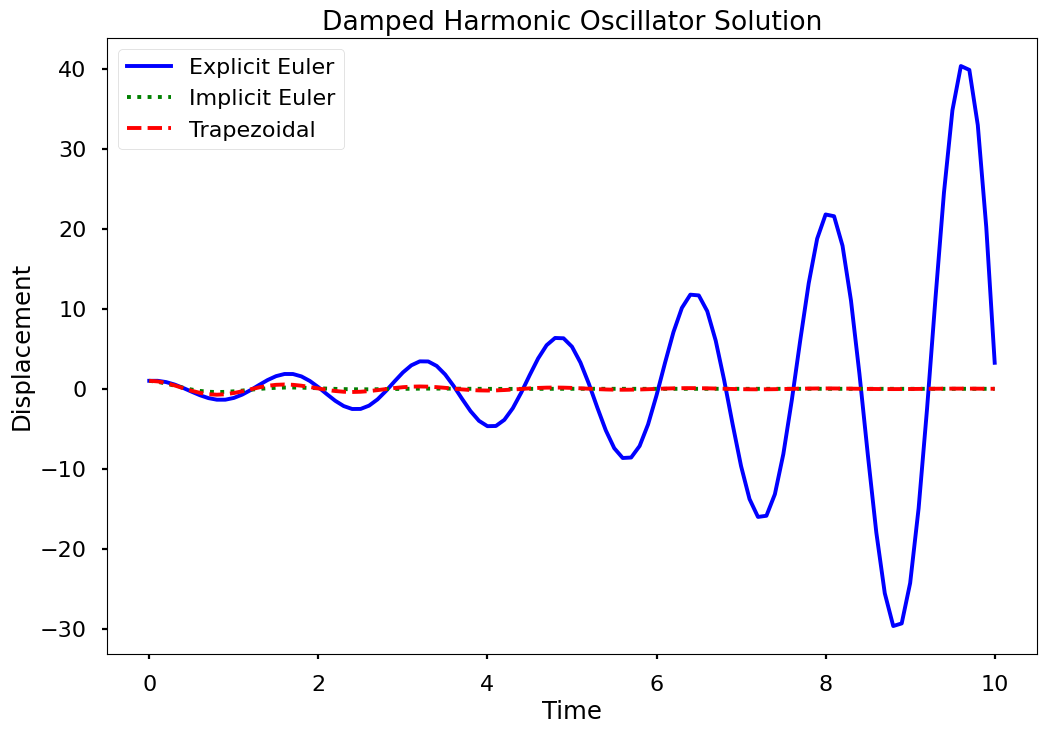

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

plt.style.use('seaborn-poster')

# Define parameters
h = 0.1  # step size
t = np.arange(0, 10.1, h)  # time grid
zeta = 0.1  # damping ratio
omega0 = 4  # natural frequency
x0 = np.array([[1], [0]])  # initial conditions [x, v]

# Matrices for numerical methods
# Euler Explicit
m_e = np.array([[1, h],
                [-omega0**2*h, 1 - 2*zeta*omega0*h]])
# Euler Implicit
m_i = inv(np.array([[1, -h],
                    [omega0**2*h, 1 + 2*zeta*omega0*h]]))
# Trapezoidal
m_t = np.dot(inv(np.array([[1, -h/2],
                           [(omega0**2)*h/2, 1 + zeta*omega0*h]])),
             np.array([[1, h/2],
                       [-(omega0**2)*h/2, 1 - zeta*omega0*h]]))

# Initialize solutions
x_e = np.zeros((len(t), 2))
x_i = np.zeros((len(t), 2))
x_t = np.zeros((len(t), 2))

# Initial conditions
x_e[0, :] = x_i[0, :] = x_t[0, :] = x0.T

# Numerical integration
for j in range(len(t)-1):
    x_e[j+1, :] = np.dot(m_e, x_e[j, :])
    x_i[j+1, :] = np.dot(m_i, x_i[j, :])
    x_t[j+1, :] = np.dot(m_t, x_t[j, :])

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t, x_e[:, 0], 'b-', label='Explicit Euler')
plt.plot(t, x_i[:, 0], 'g:', label='Implicit Euler')
plt.plot(t, x_t[:, 0], 'r--', label='Trapezoidal')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.title('Damped Harmonic Oscillator Solution')
plt.show()


# 22.5 Predictor-Corrector and Runge Kutta Methods

## Predictor-Corrector Methods

These methods improve IVP solutions by alternating between predicting the next state and correcting it. The prediction uses an explicit method (like Euler) to estimate the state, and the correction refines this estimate through an implicit approach.

- Prediction: $$ S(t_{j} + \frac{h}{2}) = S(t_j) + \frac{h}{2} F(t_j, S(t_j)) $$
- Correction: $$ S(t_{j+1}) = S(t_j) + h F(t_{j} + \frac{h}{2}, S(t_{j} + \frac{h}{2})) $$

## Runge Kutta (RK) Methods

RK methods offer a robust way to solve ODEs by combining multiple evaluations of the derivative function within a single step to enhance accuracy without needing higher derivatives.

### Fourth-order Runge Kutta (RK4)

RK4, a common choice for its accuracy and stability, calculates four estimates (k1 to k4) within each timestep and combines them to update the state:

$$ k_1 = F(t_j, S(t_j)) $$
$$ k_2 = F\left(t_j + \frac{h}{2}, S(t_j) + \frac{k_1 h}{2}\right) $$
$$ k_3 = F\left(t_j + \frac{h}{2}, S(t_j) + \frac{k_2 h}{2}\right) $$
$$ k_4 = F(t_j + h, S(t_j) + k_3 h) $$

Then the next state is computed as:

$$ S(t_{j+1}) = S(t_j) + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4) $$


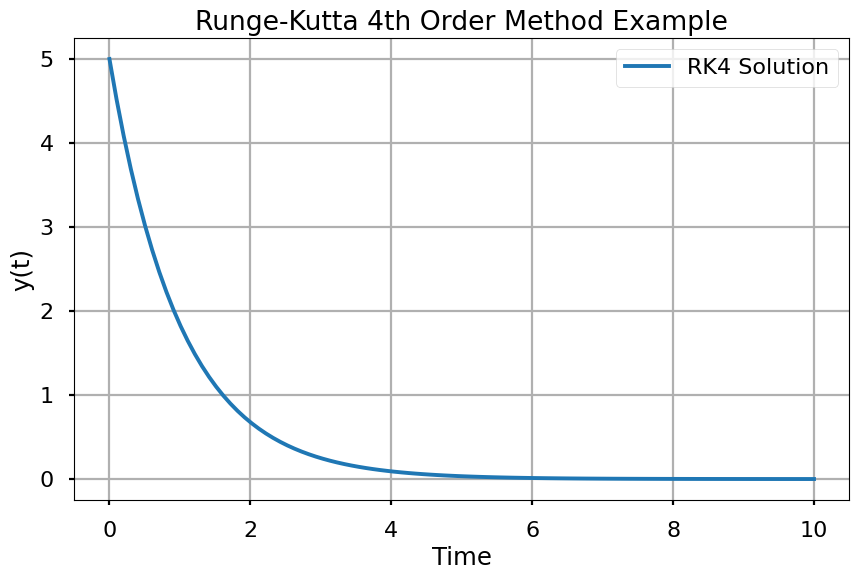

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE as a function
def ode(t, y, k=1):
    return -k * y

# Runge-Kutta 4th Order Method
def rk4(ode, t0, y0, tf, n):
    t = np.linspace(t0, tf, n)
    y = np.zeros(n)
    y[0] = y0
    h = (tf - t0) / (n - 1)

    for i in range(1, n):
        k1 = ode(t[i-1], y[i-1])
        k2 = ode(t[i-1] + 0.5 * h, y[i-1] + 0.5 * k1 * h)
        k3 = ode(t[i-1] + 0.5 * h, y[i-1] + 0.5 * k2 * h)
        k4 = ode(t[i], y[i-1] + k3 * h)
        y[i] = y[i-1] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)

    return t, y

# Parameters
t0 = 0  # Start time
y0 = 5  # Initial condition
tf = 10  # End time
n = 100  # Number of points

# Solve ODE
t, y = rk4(ode, t0, y0, tf, n)

# Plotting the solution
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='RK4 Solution')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Runge-Kutta 4th Order Method Example')
plt.legend()
plt.grid(True)
plt.show()


## 22.6 Python ODE Solvers

`scipy.integrate.solve_ivp` efficiently solves initial value problems (IVPs) for ordinary differential equations (ODEs). This function numerically integrates ODEs, given an initial state and a time span, supporting various integration methods tailored to the problem's complexity and accuracy needs.

In this example, we solve the ODE $$ \frac{dS}{dt} = \cos(t) $$ with the initial condition $$ S(0) = 0 $$ over the interval $$ [0, \pi] $$ We compare the numerical solution to the exact solution $$ S(t) = \sin(t)$$ and demonstrate adjusting the `rtol` (relative tolerance) and `atol` (absolute tolerance) to improve the accuracy of the solution.


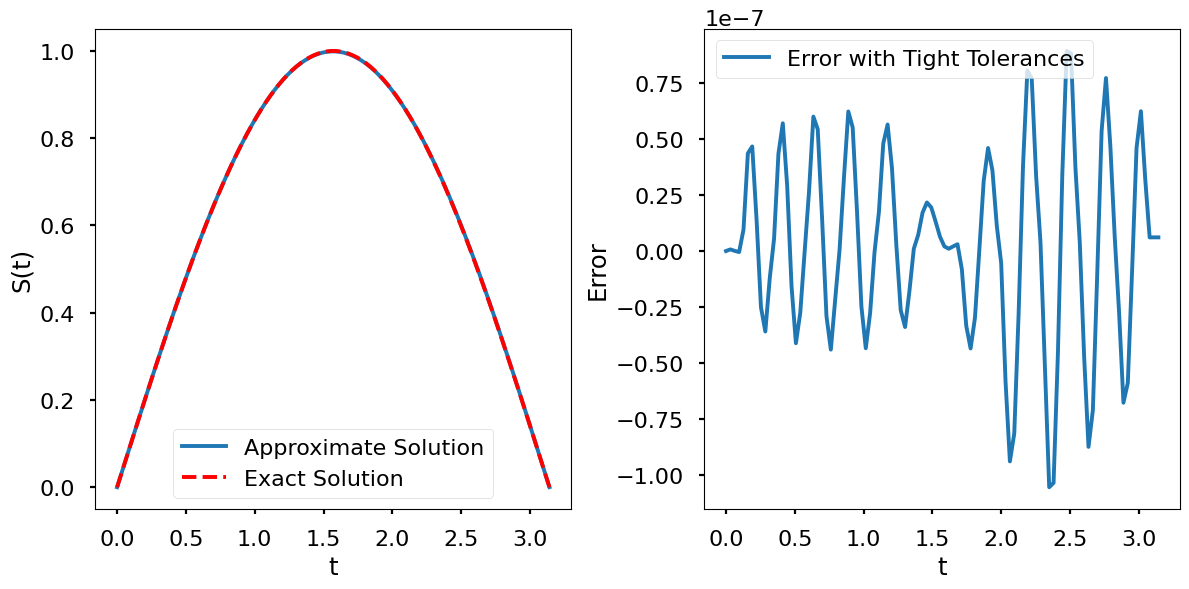

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Define the ODE
def equation(t, S):
    return np.cos(t)

# Initial condition and time span
t_span = (0, np.pi)
S0 = [0]

# Solve the ODE
sol = solve_ivp(equation, t_span, S0, t_eval=np.linspace(t_span[0], t_span[1], 100))

# Plot the approximate and exact solutions
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(sol.t, sol.y[0], label='Approximate Solution')
plt.plot(sol.t, np.sin(sol.t), 'r--', label='Exact Solution')
plt.xlabel('t')
plt.ylabel('S(t)')
plt.legend()

# Solve the ODE with tighter tolerances
sol_tight = solve_ivp(equation, t_span, S0, t_eval=np.linspace(t_span[0], t_span[1], 100), rtol=1e-8, atol=1e-8)

# Plot the error with tighter tolerances
plt.subplot(122)
plt.plot(sol_tight.t, sol_tight.y[0] - np.sin(sol_tight.t), label='Error with Tight Tolerances')
plt.xlabel('t')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()
